**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

**Importing keras and keras models**

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

**Mounting drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# %ls "drive/MyDrive/Colab Notebooks/Data/Images/Train"

**Using GPU**

In [5]:
# load GPU
# edit -> Notebook settings

**Image Augmentation**

Image augmentation should be done to increase the diversity of the dataset and improve the training accuracy.

In [6]:
dir = 'drive/MyDrive/Colab Notebooks/'
train_path = dir + 'Data/Images/Train'
test_path = dir + 'Data/Images/Test'

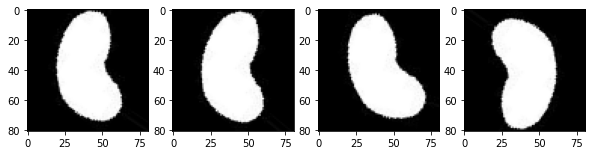

In [7]:
#Loads in image path
import matplotlib.pyplot as plt
image_path = dir + 'Data/Images/Test/kidneybean/20.jpg'
img = keras.preprocessing.image.load_img(image_path)
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=360)#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,8))#Plots our figures
for i in range(1,5):
  plt.subplot(1, 4, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()

**Data preparation**

To increase the diversity of the dataset, We use ImageDataGenerator function to rescale, flip, and rotate the sample images.

In [8]:
train_datagen = ImageDataGenerator(
                                  rescale=1./255,
#                                   shear_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  rotation_range=360,
                                  )
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [9]:
input_len = 64
b_size = 4
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(input_len, input_len),
                                                 batch_size= b_size,
                                                 class_mode='categorical',
                                                 shuffle = False)

Found 272 images belonging to 8 classes.


**Building the model**

In [10]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (input_len, input_len),
                                            batch_size = b_size,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 128 images belonging to 8 classes.


**Building the model**

In this section, we will build a convolutional neural network using Convolution, MaxPooling, Flatten, Dense, and Dropout layers. 

In [11]:
classifier = Sequential()

#Creating the method for model
#Step 1- Convolution
filter_size = 3 #3
classifier.add(Convolution2D(64, (filter_size, filter_size), input_shape = (input_len, input_len, 3), activation = 'relu'))
classifier.add(Convolution2D(32, (filter_size, filter_size), activation = 'relu'))

# #adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))

# # #Pooling it
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# #Adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))

# #Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Step 3- Flattening
classifier.add(Flatten())

#Step 4- Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

#For the output step
classifier.add(Dense(units = 8, activation = 'softmax'))
classifier.add(Dropout(0.01))

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0

**Set training options**

We use 'adam' as the optimizer to train the dataset, and use 'categorical_crossentropy' to validate during the training process. We set early_stop to stop training when the val_loss is less than 0.4. 

In [12]:
classifier.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',mode='min', baseline=0.4)

checkpointer = keras.callbacks.ModelCheckpoint(filepath = 'checkp.hdf5', monitor='val_acc', mode='max',verbose=1, 
                                               save_best_only=True)

plot_compare = classifier.fit_generator(training_set,
                    epochs = 30, #32 at final
                    validation_data=test_set,
                    callbacks = [checkpointer]
                                       )

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


68/68 [==============================] - 4s 28ms/step - loss: 2.0413 - accuracy: 0.1838 - val_loss: 1.5868 - val_accuracy: 0.3672
Epoch 2/30
68/68 [==============================] - 2s 26ms/step - loss: 1.6417 - accuracy: 0.3566 - val_loss: 0.9397 - val_accuracy: 0.6562
Epoch 3/30
68/68 [==============================] - 2s 26ms/step - loss: 1.2601 - accuracy: 0.5404 - val_loss: 0.8906 - val_accuracy: 0.6016
Epoch 4/30
68/68 [==============================] - 2s 25ms/step - loss: 1.0770 - accuracy: 0.5919 - val_loss: 0.8586 - val_accuracy: 0.6953
Epoch 5/30
68/68 [==============================] - 2s 26ms/step - loss: 1.0862 - accuracy: 0.5919 - val_loss: 0.5680 - val_accuracy: 0.7656
Epoch 6/30
68/68 [==============================] - 2s 27ms/step - loss: 1.0897 - accuracy: 0.6360 - val_loss: 0.6189 - val_accuracy: 0.7656
Epoch 7/30
68/68 [==============================] - 2s 26ms/step - loss: 0.9552 - accuracy: 0.7022 - val_loss: 0.5885 - val_accuracy: 0.7109
Epoch 8/30
68/68 [======

**Inputing new image for prediction**

{'AdukiBeans': 0, 'BrownBean': 1, 'ChickPeas': 2, 'GreenPea': 3, 'Lentils': 4, 'MarrowfatPea': 5, 'WhiteBean': 6, 'kidneybean': 7}
[[0. 1. 0. 0. 0. 0. 0. 0.]]


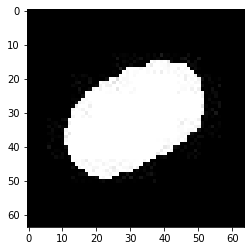

This is BrownBean


In [13]:
from keras.preprocessing import image as image_utils

test_image = image_utils.load_img(dir + 'Data/Images/Test/BrownBean/2.jpg', target_size=(64, 64))
test_image = image_utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
print(test_set.class_indices)

#Getting the prediction for input image
result = classifier.predict_on_batch(test_image)
print(result)

# matplotlib can't display image with the batch size in
plt.imshow(test_image[0].astype('uint8'))
plt.show()

for category, value in test_set.class_indices.items():
            if value == result.argmax():
                print("This is", category)

**Plotting confusion matrix for test dataset**

The confusion matrix is used here to describe the performance of trained model to classify different categories of beans.

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2843085527420044, 0.921875]


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Classification Report
              precision    recall  f1-score   support

  AdukiBeans       0.75      0.94      0.83        16
   BrownBean       1.00      0.88      0.93        16
   ChickPeas       0.91      0.62      0.74        16
    GreenPea       1.00      0.94      0.97        16
     Lentils       1.00      1.00      1.00        16
MarrowfatPea       0.84      1.00      0.91        16
   WhiteBean       0.94      1.00      0.97        16
  kidneybean       1.00      1.00      1.00        16

    accuracy                           0.92       128
   macro avg       0.93      0.92      0.92       128
weighted avg       0.93      0.92      0.92       128



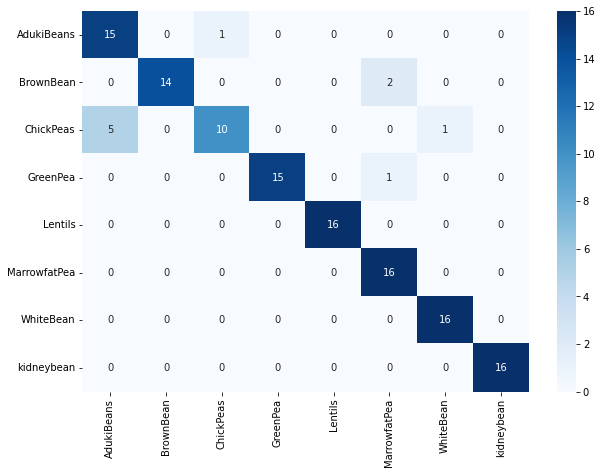

In [14]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

print(classifier.evaluate_generator(test_set, 128))


Y_pred = classifier.predict_generator(test_set, test_set.samples // test_set.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm_test = confusion_matrix(test_set.classes, y_pred)

df_cm = pd.DataFrame(cm_test, index = [i for i in test_set.class_indices.keys()],
                  columns = [i for i in test_set.class_indices.keys()])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='Blues' )

print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=test_set.class_indices.keys()))

**Plotting graph for training accuracy and validation accuracy**

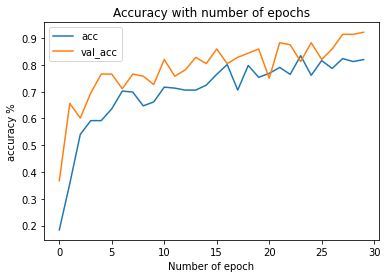

In [15]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['accuracy'])
pllt.plot(plot_compare.history['val_accuracy'])
pllt.title('Accuracy with number of epochs')
pllt.ylabel('accuracy %')
pllt.xlabel('Number of epoch')
pllt.legend(['acc', 'val_acc'])
pllt.show()

**Plotting graph for loss between training and test set**

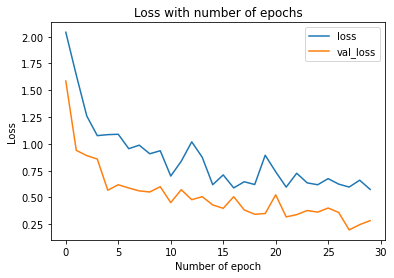

In [16]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['loss'])
pllt.plot(plot_compare.history['val_loss'])
pllt.title('Loss with number of epochs')
pllt.ylabel('Loss')
pllt.xlabel('Number of epoch')
pllt.legend(['loss', 'val_loss'])
pllt.show()